In [1]:
pip install pysus # O pySUS é um pacote Python projetado para acessar dados de saúde pública do Sistema Único de Saúde (SUS) do Brasil.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from pysus.online_data import SINAN
from IPython.display import display
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
SINAN.list_diseases()

{'ACBI': 'Acidente de trabalho com material biológico',
 'ACGR': 'Acidente de trabalho',
 'ANIM': 'Acidente por Animais Peçonhentos',
 'ANTR': 'Atendimento Antirrabico',
 'BOTU': 'Botulismo',
 'CANC': 'Cancêr relacionado ao trabalho',
 'CHAG': 'Doença de Chagas Aguda',
 'CHIK': 'Febre de Chikungunya',
 'COLE': 'Cólera',
 'COQU': 'Coqueluche',
 'DENG': 'Dengue',
 'DERM': 'Dermatoses ocupacionais',
 'DIFT': 'Difteria',
 'ESQU': 'Esquistossomose',
 'EXAN': 'Doença exantemáticas',
 'FMAC': 'Febre Maculosa',
 'FTIF': 'Febre Tifóide',
 'HANS': 'Hanseníase',
 'HANT': 'Hantavirose',
 'HEPA': 'Hepatites Virais',
 'IEXO': 'Intoxicação Exógena',
 'INFL': 'Influenza Pandêmica',
 'LEIV': 'Leishmaniose Visceral',
 'LEPT': 'Leptospirose',
 'LERD': 'LER/Dort',
 'LTAN': 'Leishmaniose Tegumentar Americana',
 'MALA': 'Malária',
 'MENI': 'Meningite',
 'MENT': 'Transtornos mentais relacionados ao trabalho',
 'NTRA': 'Notificação de Tracoma',
 'PAIR': 'Perda auditiva por ruído relacionado ao trabalho',
 'PE

In [4]:
SINAN.download('VIOL', years= 2022) #puxando dados sobre violencia de 2022

VIOLBR22.parquet: 100%|██████████| 1.46M/1.46M [02:15<00:00, 10.8kB/s]


/root/pysus/VIOLBR22.parquet

In [5]:
df_violencia = pd.read_parquet ('/root/pysus/VIOLBR22.parquet')

Dados sobre gênero da vítima no cadastro das ocorrências.

In [6]:
cs_sexo_column = df_violencia['CS_SEXO']

Filtrar a quantidade por categoria: masculino, feminino e ignorado de acordo com o dicionário de dados

In [7]:
df_violencia['CS_SEXO'] = df_violencia['CS_SEXO'].str.strip().str.lower() #strip limpa espaços em branco, lower deixa tudo em lowercase para não haver diferença entre 'M' e 'm'

count_m = (df_violencia['CS_SEXO'] == 'm').sum() #'==' cria uma operação boleana e dps o sum soma a quantidade de true que existe para o valor m
count_f = (df_violencia['CS_SEXO'] == 'f').sum()
count_i = (df_violencia['CS_SEXO'] == 'i').sum()

print("Count of 'm':", count_m)
print("Count of 'f':", count_f)
print("Count of 'i':", count_i)

Count of 'm': 150890
Count of 'f': 358069
Count of 'i': 191


Criação de um gráfico para representação visual dessa análise.

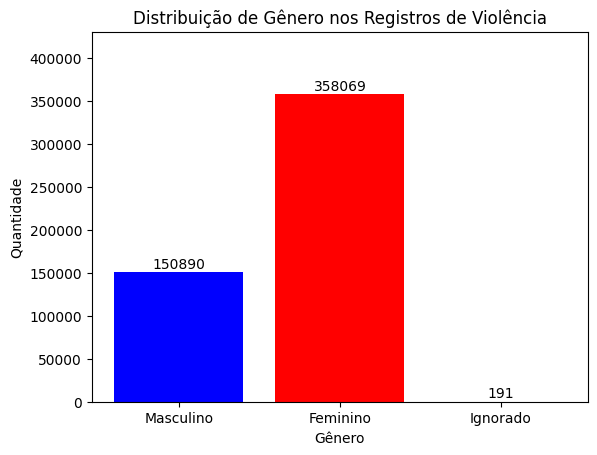

In [8]:
sexo = ['Masculino', 'Feminino', 'Ignorado']
quantidades = [count_m, count_f, count_i]

plt.bar(sexo, quantidades, color=['blue', 'red', 'grey'])
plt.title('Distribuição de Gênero nos Registros de Violência')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.ylim(0, max(quantidades) * 1.2)  # Defina 20% acima do valor máximo para garantir espaço para exibir todos os valores
for i, valor in enumerate(quantidades):
    plt.text(i, valor + 1000, str(valor), ha='center', va='bottom')

plt.show()

Desbravando dados sobre ocorrências de acordo com a UF (estados).

In [9]:
print(df_violencia['SG_UF_OCOR'])

0         43
1         52
2         43
3         43
4         31
          ..
509145    35
509146    35
509147    35
509148    35
509149    43
Name: SG_UF_OCOR, Length: 509150, dtype: object


In [37]:
value_counts = df_violencia['SG_UF_OCOR'].value_counts()
print(value_counts)

SG_UF_OCOR
35    127830
33     51140
31     49474
41     41821
       32976
43     26456
26     22465
23     21128
42     16925
52     16477
29     16325
15     12246
50     10774
53      9293
13      6875
27      6557
21      5408
17      5152
51      5091
25      4915
22      4582
24      4497
28      3158
14      2351
11      2159
12      2118
16       920
32        32
/N         5
Name: count, dtype: int64


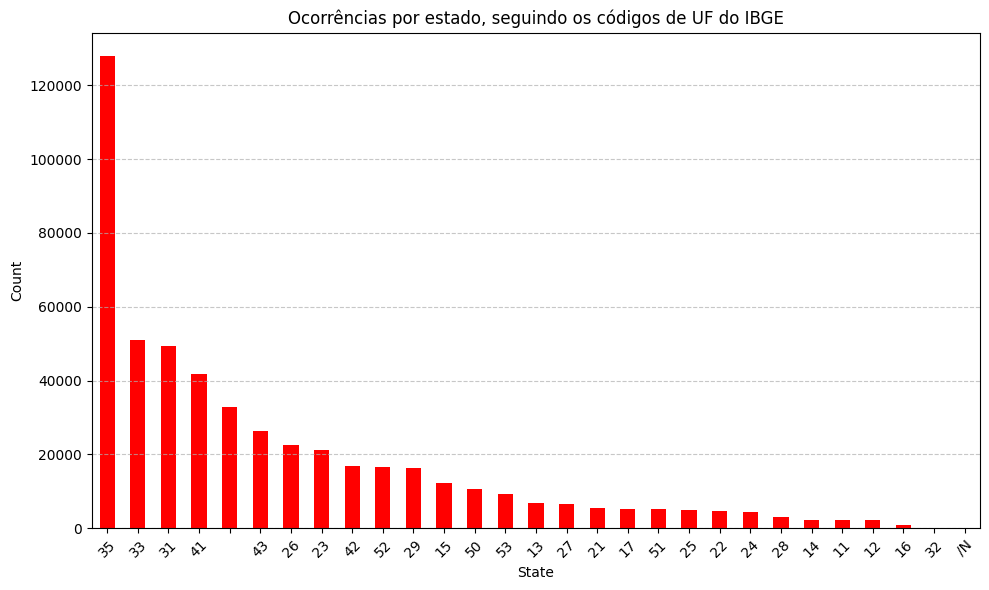

In [11]:
value_counts = df_violencia['SG_UF_OCOR'].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='red')
plt.title('Ocorrências por estado, seguindo os códigos de UF do IBGE')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Investigando dados sobre encaminhamento ao atendimento à mulher.

In [18]:
print(df_violencia['ATEND_MULH'])

#revisitando o dicionário de dados para checar os resultados...

0         2
1         2
2         2
3         2
4         2
         ..
509145    2
509146    2
509147    2
509148    9
509149    1
Name: ATEND_MULH, Length: 509150, dtype: object


In [19]:
value_counts = df_violencia['ATEND_MULH'].value_counts()
print(value_counts)

#ATEND_MULH: Informar se houve encaminhamento no setor da rede atendimento à mulher.

ATEND_MULH
2    421811
1     31947
9     28550
      26842
Name: count, dtype: int64


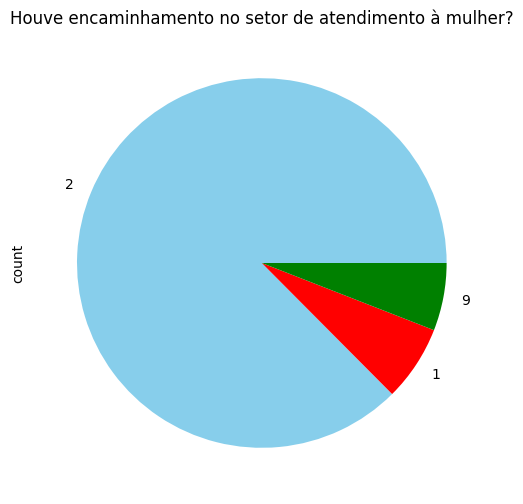

In [34]:
value_counts = df_violencia['ATEND_MULH'].value_counts()

# Select counts for specific values and set missing values to 0
specific_values_counts = value_counts.reindex(['2', '1', '9']).fillna(0)

# Create a bar plot
plt.figure(figsize=(8, 6))
specific_values_counts.plot(kind='pie', colors=['skyblue','red','green'])
plt.title('Houve encaminhamento no setor de atendimento à mulher?')
plt.show()

Investigando as ocorrências mais frequentes. Os dados seguem a classificação do CID-10.

In [32]:
top_10_ocorrencias = df_violencia['CIRC_LESAO'].value_counts().head(11)
print("Top 10 tipos de ocorrências:")
print(top_10_ocorrencias[1:])  # Excluindo o primeiro item

Top 10 tipos de ocorrências:
CIRC_LESAO
Y04      20292
Y09      19254
Y04.0    17584
Y06.1     9429
Y05.0     7324
X61.0     7295
X61       6408
X64       6035
X64.0     5575
Y05       5285
Name: count, dtype: int64


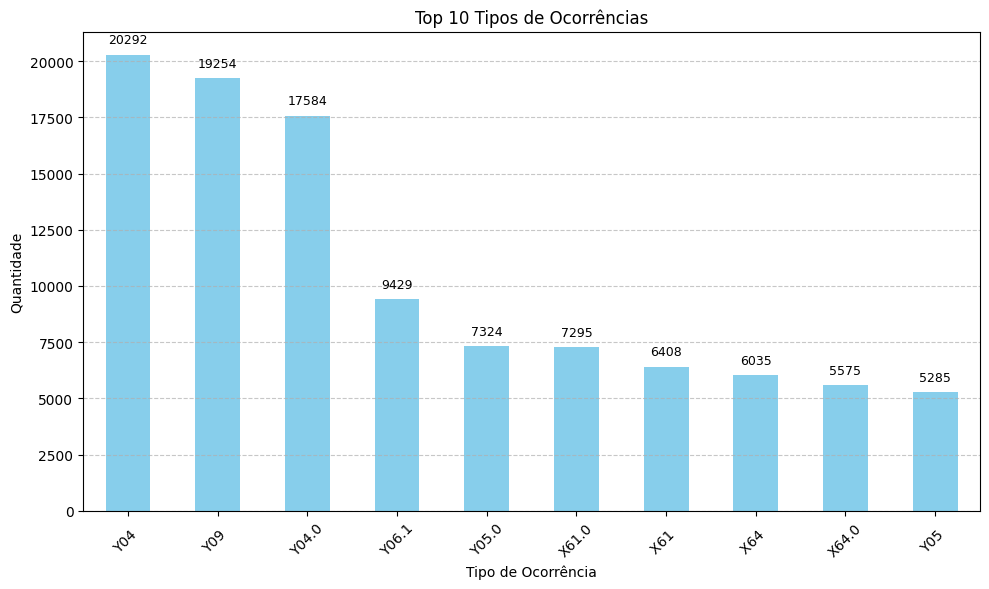

In [33]:
top_10_ocorrencias = df_violencia['CIRC_LESAO'].value_counts().head(11)[1:]

plt.figure(figsize=(10, 6))
bars = top_10_ocorrencias.plot(kind='bar', color='skyblue')
plt.title('Top 10 Tipos de Ocorrências')
plt.xlabel('Tipo de Ocorrência')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os números exatos acima das barras
for i, value in enumerate(top_10_ocorrencias):
    plt.text(i, value + 500, str(value), ha='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()